# Sensor Performance
A notebook to test performance of various lick sensors needed for the physical setup.

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Capacitive sensor

In [12]:
data_filepath = '../data/test.log'
data = np.frombuffer(open(data_filepath, 'rb').read(), dtype=np.float32)

ValueError: buffer size must be a multiple of element size

In [17]:
data = np.loadtxt(data_filepath, dtype=np.float32)

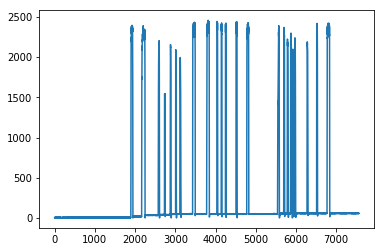

In [19]:
plt.plot(data)

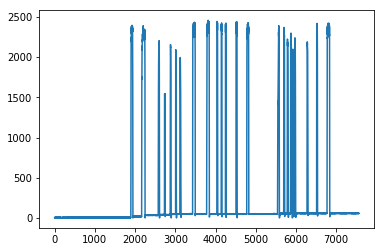

In [20]:
data = np.loadtxt(data_filepath)
plt.plot(data)